<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Zahra GhayourHallajz

**Student ID**:400101689


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?


## Deriving the Dual Optimization Problem for the Soft-Margin SVM
<font color='green'>
To derive the dual optimization problem for the Soft-Margin SVM, we start with the primal formulation:

$$
\begin{aligned}
& \min_{w, b, \xi} \quad & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.} \quad & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
$$

First, we form the Lagrangian by introducing Lagrange multipliers $\alpha_i \geq 0$ for the constraints $y_i(w^T x_i + b) \geq 1 - \xi_i$ and $\mu_i \geq 0$ for the constraints $\xi_i \geq 0$:

$$
\mathcal{L}(w, b, \xi, \alpha, \mu) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \alpha_i [y_i(w^T x_i + b) - 1 + \xi_i] - \sum_{i=1}^{N} \mu_i \xi_i
$$

Next, we take the partial derivatives of $\mathcal{L}$ with respect to $w$, $b$, and $\xi_i$, and set them to zero to find the stationary points.

1. Partial derivative with respect to $w$:

$$
\frac{\partial \mathcal{L}}{\partial w} = w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0 \quad \Rightarrow \quad w = \sum_{i=1}^{N} \alpha_i y_i x_i
$$

2. Partial derivative with respect to $b$:

$$
\frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^{N} \alpha_i y_i = 0 \quad \Rightarrow \quad \sum_{i=1}^{N} \alpha_i y_i = 0
$$

3. Partial derivative with respect to $\xi_i$:

$$
\frac{\partial \mathcal{L}}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \quad \Rightarrow \quad \alpha_i + \mu_i = C
$$

Since $\mu_i \geq 0$, it implies that $0 \leq \alpha_i \leq C$.

Substitute $w$ back into the Lagrangian:

$$
\mathcal{L}(w, b, \xi, \alpha, \mu) = \frac{1}{2} \left(\sum_{i=1}^{N} \alpha_i y_i x_i \right)^T \left(\sum_{i=1}^{N} \alpha_i y_i x_i \right) + C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \alpha_i [y_i(w^T x_i + b) - 1 + \xi_i] - \sum_{i=1}^{N} \mu_i \xi_i
$$

Simplify:

$$
\mathcal{L}(w, b, \xi, \alpha, \mu) = \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j - \sum_{i=1}^{N} \alpha_i y_i (\sum_{j=1}^{N} \alpha_j y_j x_j^T x_i + b) + \sum_{i=1}^{N} \alpha_i - \sum_{i=1}^{N} \alpha_i \xi_i - \sum_{i=1}^{N} \mu_i \xi_i + C \sum_{i=1}^{N} \xi_i
$$

Note that:

$$
-\sum_{i=1}^{N} \alpha_i \xi_i - \sum_{i=1}^{N} \mu_i \xi_i + C \sum_{i=1}^{N} \xi_i = \sum_{i=1}^{N} (C - \alpha_i - \mu_i) \xi_i = 0
$$

Thus:

$$
\mathcal{L}(w, b, \xi, \alpha, \mu) = \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j - \sum_{i=1}^{N} \alpha_i + \sum_{i=1}^{N} \alpha_i = \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j - \sum_{i=1}^{N} \alpha_i
$$

So, the dual formulation is:

$$
\begin{aligned}
& \max_{\alpha} \quad & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
& \text{s.t.} \quad & \sum_{i=1}^{N} \alpha_i y_i = 0 \\
& & 0 \leq \alpha_i \leq C, \; i = 1, \ldots, N
\end{aligned}
$$

## Calculating the Weights and Bias Using the Dual Problem Optimum Points

Given the optimal $\alpha_i^*$, we can calculate the weight vector $w$:

$$
w = \sum_{i=1}^{N} \alpha_i^* y_i x_i
$$

To find the bias $b$, we use the fact that for any support vector $x_k$ (i.e., $\alpha_k > 0$):

$$
y_k (w^T x_k + b) = 1 - \xi_k \quad \text{(if \(\xi_k = 0\))}
$$

Thus, for support vectors:

$$
b = y_k - \sum_{i=1}^{N} \alpha_i^* y_i x_i^T x_k
$$

In practice, $b$ is often averaged over all support vectors for better stability:

$$
b = \frac{1}{|\{k: 0 < \alpha_k < C\}|} \sum_{k: 0 < \alpha_k < C} \left( y_k - \sum_{i=1}^{N} \alpha_i^* y_i x_i^T x_k \right)
$$

## Classifying New Data Points Using the Optimal Weights and Bias

To classify a new data point $x$, we use the decision function:

$$
f(x) = w^T x + b
$$

If $f(x) \geq 0$, we classify $x$ as $+1$, otherwise as $-1$. Thus, the classification rule is:

$$
\text{Class}(x) = \text{sign}(w^T x + b)
$$

In summary, after solving the dual optimization problem to get the optimal $\alpha_i^*$, we calculate $w$ and $b$, and then classify new data points using the sign of the decision function $w^T x + b$.


Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [4]:
## YOUR CODE HERE
# Load datasets
df1 = pd.read_csv('DF1.csv')
df2 = pd.read_csv('DF2.csv')
df3 = pd.read_csv('DF3.csv')

# Display the first 5 rows of each dataset
print("First 5 rows of DF1.csv:")
display(df1.head())

print("\nFirst 5 rows of DF2.csv:")
display(df2.head())

print("\nFirst 5 rows of DF3.csv:")
display(df3.head())

First 5 rows of DF1.csv:


,x1,x2,y
0,6.462652,5.121478,-1
1,-6.586541,-7.721287,1
2,9.239683,-8.595738,-1
3,4.250052,2.143755,1
4,8.219779,-3.609733,-1



First 5 rows of DF2.csv:


,x1,x2,y
0,2.937145,77.102291,1
1,-0.029344,44.802353,1
2,5.868818,44.595757,-1
3,8.609281,49.223945,-1
4,7.763276,-14.340750,-1



First 5 rows of DF3.csv:


,x1,x2,y
0,-0.517768,-0.466158,-1
1,0.940985,0.235175,1
2,-0.470720,0.917120,1
3,0.712716,-0.097401,-1
4,-0.608773,-0.107034,-1


Use the following function to visualize the datapoints for all datasets.

Visualizing DF1.csv:


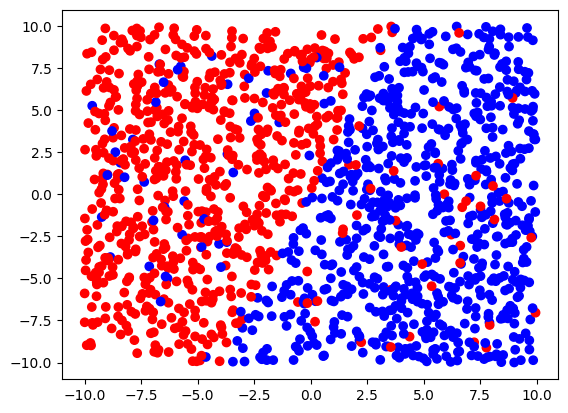

Visualizing DF2.csv:


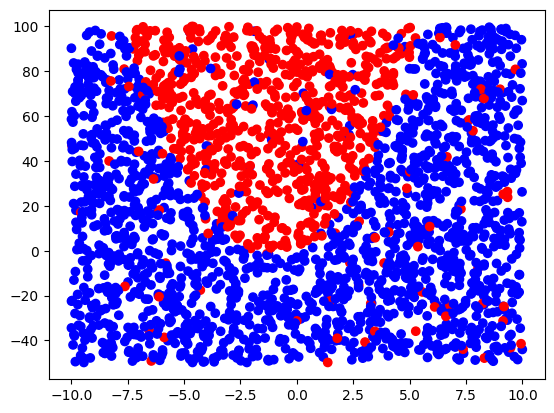

Visualizing DF3.csv:


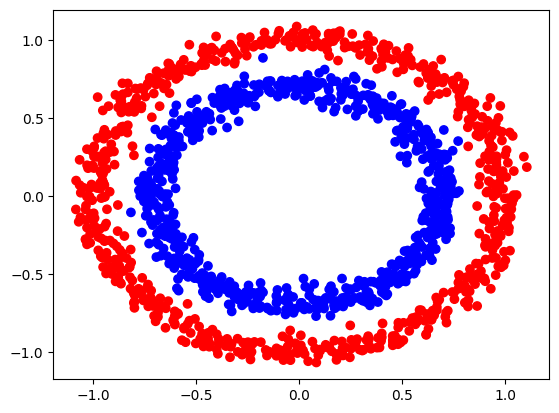

In [6]:
def visualize_data(X, y):
  col = []
  for i in range(len(y)):
    if y[i] == 1:
      col.append('red')
    else:
      col.append('blue')
  plt.scatter(X[ : , 0], X[ : , 1], color = col)
  plt.show()

## YOUR CODE HERE
# Extract features and labels, and visualize each dataset
def prepare_and_visualize(df):
    # Assuming the last column is the label
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    visualize_data(X, y)

print("Visualizing DF1.csv:")
prepare_and_visualize(df1)

print("Visualizing DF2.csv:")
prepare_and_visualize(df2)

print("Visualizing DF3.csv:")
prepare_and_visualize(df3)

**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

<font color='green'>

1. **Linear Kernel**:
    - Suitable for datasets that are linearly separable or nearly linearly separable.
    - Computationally less intensive compared to non-linear kernels.

2. **Polynomial Kernel (degree 2)**:
    - Suitable for datasets where the relationship between features is polynomial.
    - Can model interactions between features.

3. **RBF Kernel**:
    - Suitable for datasets where the decision boundary is not linear and may have complex shapes.
    - Effective in high-dimensional spaces and can handle non-linear relationships.

### Choice of Kernel for Each Dataset:

1. **Dataset 1 (DF1.csv)**:
    - **Kernel**: **Linear Kernel**
    - **Justification**: If initial visualization indicates a roughly linear separation between classes, the linear kernel would be appropriate. The linear kernel is simple and less computationally intensive, which is beneficial if the data is already linearly separable.

2. **Dataset 2 (DF2.csv)**:
    - **Kernel**: **Polynomial Kernel of degree 2**
    - **Justification**: If the data shows some polynomial relationships or interactions between features, a polynomial kernel would be suitable. For instance, if the decision boundary appears to be quadratic, this kernel will capture such patterns well.

3. **Dataset 3 (DF3.csv)**:
    - **Kernel**: **RBF Kernel**
    - **Justification**: If the data is complex with non-linear decision boundaries, the RBF kernel is the best choice. It can handle various non-linear relationships and is powerful in high-dimensional feature spaces.

Based on visualization and general guidelines, the kernel choices should be:

1. **Dataset 1 (DF1.csv)**: Linear Kernel
2. **Dataset 2 (DF2.csv)**: Polynomial Kernel of degree 2
3. **Dataset 3 (DF3.csv)**: RBF Kernel

These choices balance the strengths of each kernel with the expected characteristics of the datasets, aiming to maximize the overall accuracy across all datasets.

## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [7]:
## YOUR CODE HERE
# Step 1: Split the dataset into train and test sets
X = df1.iloc[:, :-1].values  # Extract features
y = df1.iloc[:, -1].values  # Extract labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (1180, 2)
Test set shape: (296, 2)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [8]:
!pip install cvxpy

In [9]:
# Step 6: Formulate and solve the dual problem using CVXPY
n_samples, n_features = X_train_scaled.shape

# Gram matrix
K = np.dot(X_train_scaled, X_train_scaled.T)  # Linear kernel

# CVXPY variables
alpha = cp.Variable(n_samples)
alpha_sum = cp.sum(alpha)
alpha_y = cp.multiply(alpha, y_train)
objective = cp.Maximize(alpha_sum - 0.5 * cp.norm(alpha_y, p=2)**2)  # Using cp.norm for quadratic term

# Constraints
constraints = [cp.sum(cp.multiply(alpha, y_train)) == 0, alpha >= 0, alpha <= 1]  # Assuming C=1 for this example

# Problem definition
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Extract the optimal alpha values
alpha_opt = alpha.value

# Ensure alpha_opt is a 1-dimensional array
alpha_opt = np.squeeze(alpha_opt)

# Compute the weight vector
w_opt = np.dot(alpha_opt * y_train, X_train_scaled)

# Support vectors have non-zero lagrange multipliers
support_vectors = alpha_opt > 1e-5
w_opt = np.sum((alpha_opt[support_vectors] * y_train[support_vectors])[:, np.newaxis] * X_train_scaled[support_vectors], axis=0)

# Compute the bias term
b_opt = np.mean(y_train[support_vectors] - np.dot(X_train_scaled[support_vectors], w_opt))

print("Optimal alpha values:", alpha_opt)
print("Optimal weight vector:", w_opt)
print("Optimal bias:", b_opt)


Optimal alpha values: [0.9093851  0.99999998 0.9093851  ... 0.9093851  0.9093851  0.99999998]
Optimal weight vector: [-837.07611244  184.53702759]
Optimal bias: -0.047457627118529994


Predict the class of each entry in the test set using your learned model.

In [10]:
## YOUR CODE HERE
# Compute the decision function for the test set
decision_function = np.dot(X_test_scaled, w_opt) + b_opt

# Predict class labels based on the decision function
y_pred = np.sign(decision_function)

# Display the predicted class labels and true class labels for comparison
print("Predicted labels:", y_pred)
print("True labels:", y_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Predicted labels: [-1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
  1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.
  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.
  1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.
  1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.
 -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.
 -1. -1. -1. -1.  1. -1. -1. -1. 

Use classification_report function (from sklearn) to get the accuracy of your model.

In [11]:
## YOUR CODE HERE
# Generate classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.91      0.91       148
           1       0.91      0.93      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [12]:
## YOUR CODE HERE
# Step 2: Split the dataset into train and test sets (80% train, 20% test)
X = df2.iloc[:, :-1].values  # Features
y = df2.iloc[:, -1].values   # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Step 3: Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set shape: (1980, 2)
Test set shape: (496, 2)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [13]:
# Step 4: Formulate and solve the dual problem using CVXPY with a polynomial kernel of degree 2
import numpy as np
import cvxpy as cp

n_samples, n_features = X_train_scaled.shape

# Polynomial kernel of degree 2
K = np.square(1 + np.dot(X_train_scaled, X_train_scaled.T))

# CVXPY variables
alpha = cp.Variable(n_samples)
alpha_sum = cp.sum(alpha)
alpha_y = cp.multiply(alpha, y_train)
objective = cp.Maximize(alpha_sum - 0.5 * cp.norm(alpha_y, p=2)**2)

# Constraints
constraints = [cp.sum(cp.multiply(alpha, y_train)) == 0, alpha >= 0, alpha <= 1]

# Problem definition
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Extract the optimal alpha values
alpha_opt = alpha.value

# Ensure alpha_opt is a 1-dimensional array
alpha_opt = np.squeeze(alpha_opt)

# Compute the weight vector
w_opt = np.dot(alpha_opt * y_train, X_train_scaled)

# Support vectors have non-zero lagrange multipliers
support_vectors = alpha_opt > 1e-5
w_opt = np.sum((alpha_opt[support_vectors] * y_train[support_vectors])[:, np.newaxis] * X_train_scaled[support_vectors], axis=0)

# Compute the bias term
b_opt = np.mean(y_train[support_vectors] - np.dot(X_train_scaled[support_vectors], w_opt))

print("Optimal alpha values:", alpha_opt)
print("Optimal weight vector:", w_opt)
print("Optimal bias:", b_opt)


Optimal alpha values: [1.         0.42960289 1.         ... 0.42960289 0.42960289 0.42960291]
Optimal weight vector: [-110.10608819  575.98075696]
Optimal bias: -0.398989898990193


Predict the class of each entry in the test set using your learned model.

In [14]:
## YOUR CODE HERE
# Step 5: Predict the class labels for the test set
decision_function = np.dot(X_test_scaled, w_opt) + b_opt
y_pred = np.sign(decision_function)

# Display the predicted labels and true labels for comparison
print("Predicted labels:", y_pred)
print("True labels:", y_test)
# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Predicted labels: [-1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.
  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1.
 -1. -1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1.
 -1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1.
 -1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.  1. -1.
 -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.
 -1. -1.  1. -1.  1. -1. -1.  1. 

Use classification_report function (from sklearn) to get the accuracy of your model.

In [15]:
## YOUR CODE HERE
# Step 6: Evaluate the model using classification_report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.64      0.74       336
           1       0.51      0.79      0.62       160

    accuracy                           0.69       496
   macro avg       0.69      0.72      0.68       496
weighted avg       0.75      0.69      0.70       496



## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [12]:
## YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
# Step 2: Split the dataset into train and test sets (80% train, 20% test)
X = df3.iloc[:, :-1].values  # Features
y = df3.iloc[:, -1].values   # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), slice(0, 2))
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)


Training set shape: (1167, 2)
Test set shape: (292, 2)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [42]:
import numpy as np
import cvxpy as cp
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

def compute_gram_matrix(data_matrix):
    """
    Compute the Gram matrix.

    Args:
        data_matrix (np.ndarray): Input data matrix.

    Returns:
        np.ndarray: Computed Gram matrix.
    """
    gram_matrix = (np.dot(data_matrix, data_matrix.T) + 1) ** 2
    return 0.5 * (gram_matrix + gram_matrix.T)

def formulate_svm_problem(gram_matrix, labels, regularization_param):
    """
    Formulate the SVM optimization problem.

    Args:
        gram_matrix (np.ndarray): Gram matrix.
        labels (np.ndarray): Labels.
        regularization_param (float): Regularization parameter.

    Returns:
        lagrange_multipliers (cp.Variable): Lagrange multipliers.
        optimization_problem (cp.Problem): Optimization problem.
    """
    num_samples = len(labels)
    lagrange_multipliers = cp.Variable(num_samples)
    P = cp.multiply(np.outer(labels, labels), gram_matrix)
    P = 0.5 * (P + P.T)
    P = cp.atoms.affine.wraps.psd_wrap(P)
    objective_function = cp.Maximize(cp.sum(lagrange_multipliers) - 0.5 * cp.quad_form(lagrange_multipliers, P))
    constraints = [lagrange_multipliers >= 0, lagrange_multipliers <= regularization_param, cp.sum(cp.multiply(lagrange_multipliers, labels)) == 0]
    return lagrange_multipliers, cp.Problem(objective_function, constraints)

def identify_support_vectors(lagrange_multipliers, threshold=1e-5):
    """
    Identify support vectors based on Lagrange multipliers.

    Args:
        lagrange_multipliers (np.ndarray): Lagrange multipliers.
        threshold (float): Threshold for considering a Lagrange multiplier as nonzero.

    Returns:
        support_vector_indices (np.ndarray): Indices of support vectors.
        support_vectors (np.ndarray): Boolean array indicating support vectors.
    """
    support_vectors = lagrange_multipliers > threshold
    return np.flatnonzero(support_vectors), support_vectors

def compute_model_bias(gram_matrix, support_vectors, optimal_lagrange_multipliers, labels):
    """
    Compute the bias term for SVM.

    Args:
        gram_matrix (np.ndarray): Gram matrix.
        support_vectors (np.ndarray): Boolean array indicating support vectors.
        optimal_lagrange_multipliers (np.ndarray): Optimal Lagrange multipliers.
        labels (np.ndarray): Labels.

    Returns:
        float: Computed bias term.
    """
    gram_matrix_sv = gram_matrix[support_vectors][:, support_vectors]
    alpha_y_sv = optimal_lagrange_multipliers[support_vectors] * labels[support_vectors]
    return np.mean(labels[support_vectors] - np.dot(gram_matrix_sv, alpha_y_sv))

def train_svm(data_matrix, labels, regularization_param):
    """
    Train an SVM model.

    Args:
        data_matrix (np.ndarray): Input data matrix.
        labels (np.ndarray): Labels.
        regularization_param (float): Regularization parameter.

    Returns:
        optimal_lagrange_multipliers (np.ndarray): Optimal Lagrange multipliers obtained from training.
        bias (float): Bias term computed during training.
    """
    # Compute Gram matrix
    gram_matrix = compute_gram_matrix(data_matrix)

    # Formulate SVM problem
    lagrange_multipliers, optimization_problem = formulate_svm_problem(gram_matrix, labels, regularization_param)

    # Solve SVM optimization problem
    optimization_result = optimization_problem.solve()

    # Retrieve optimal Lagrange multipliers
    optimal_lagrange_multipliers = lagrange_multipliers.value

    # Identify support vectors
    support_vector_indices, support_vectors = identify_support_vectors(optimal_lagrange_multipliers)

    # Compute bias term
    bias = compute_model_bias(gram_matrix, support_vectors, optimal_lagrange_multipliers, labels)

    return optimal_lagrange_multipliers, bias

def predict_svm(X_train_data, y_train, X_test_data, lagrange_multipliers, bias):
    """
    Predict labels using trained SVM model.

    Args:
        X_train_data (np.ndarray): Training data matrix.
        y_train (np.ndarray): Training labels.
        X_test_data (np.ndarray): Test data matrix.
        lagrange_multipliers (np.ndarray): Optimal Lagrange multipliers obtained from training.
        bias (float): Bias term computed during training.

    Returns:
        np.ndarray: Predicted labels for the test data.
    """
    # Identify support vectors based on Lagrange multipliers
    support_vectors = lagrange_multipliers > 1e-5
    support_vector_indices = np.flatnonzero(support_vectors)

    # Calculate alpha * y for support vectors
    alpha_y_sv = lagrange_multipliers[support_vectors] * y_train[support_vector_indices]

    # Compute Gram matrix between test and support vectors
    gram_matrix_test = (np.dot(X_test_data, X_train_data.T) + 1) ** 2

    # Compute decision function and make predictions
    decision_function = np.dot(gram_matrix_test[:, support_vector_indices], alpha_y_sv) + bias
    predictions = np.sign(decision_function)

    return predictions


Predict the class of each entry in the test set using your learned model.

Use classification_report function (from sklearn) to get the accuracy of your model.

In [43]:
kfold = KFold(n_splits=5, shuffle=True)

# Assuming X_train_scaled and y_train are your scaled training data and labels
fold_no = 1
for train_index, test_index in kfold.split(X_train_scaled, y_train):
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Train SVM model
    optimal_lagrange_multipliers, bias = train_svm(X_train_fold, y_train_fold, regularization_param=1.0)

    # Make predictions
    predictions = predict_svm(X_train_fold, y_train_fold, X_test_fold, optimal_lagrange_multipliers, bias)

    # Print predictions for the fold
    print(f'Predictions for  {fold_no}:\n', predictions)

    # Print classification report for the fold
    print(f'Classification Report for  {fold_no}:\n', classification_report(y_test_fold, predictions))

    fold_no += 1

Predictions for  1:
 [ 1. -1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1. -1.  1.
  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1. -1. -1.  1.
  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1.  1.
  1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.
 -1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1.
  1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1.
  1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.
 -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.
  1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.
 -1.  1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1.]
Classification Report for  1: